# Analyze classifier evidence based on context decoding

In [1]:
import os
from pathlib import Path
import pingouin as pg
import pandas as pd
from psifr import fr

from dcmr import task
from dcmr import decode
from dcmr import figures

cfr_dir = Path(os.environ['CFR_RESULTS'])

class_dir = cfr_dir / 'eeg' / 'decode' / 'logreg_pmvpa_r10'
kind = 'eeg'
kind_label = 'EEG'

fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim3'
fig_dir.mkdir(exist_ok=True)
figures.set_style()

## Read classifier evidence

In [2]:
subjects, _ = task.get_subjects()
evidence_raw = decode.read_evidence(class_dir, subjects)

In [3]:
# load full events
data = task.read_study_recall(cfr_dir / 'cfr_eeg_mixed.csv')
study = fr.filter_data(data, trial_type='study').reset_index()
study = decode.mark_included_eeg_events(study, class_dir)

In [4]:
# merge with study events to get block information
merge_keys = ['subject', 'list', 'position', 'trial_type']
evidence_keys = merge_keys + ['cel', 'loc', 'obj']
evidence = pd.merge(study, evidence_raw[evidence_keys], on=merge_keys, how='outer')
evidence = evidence.query('include')

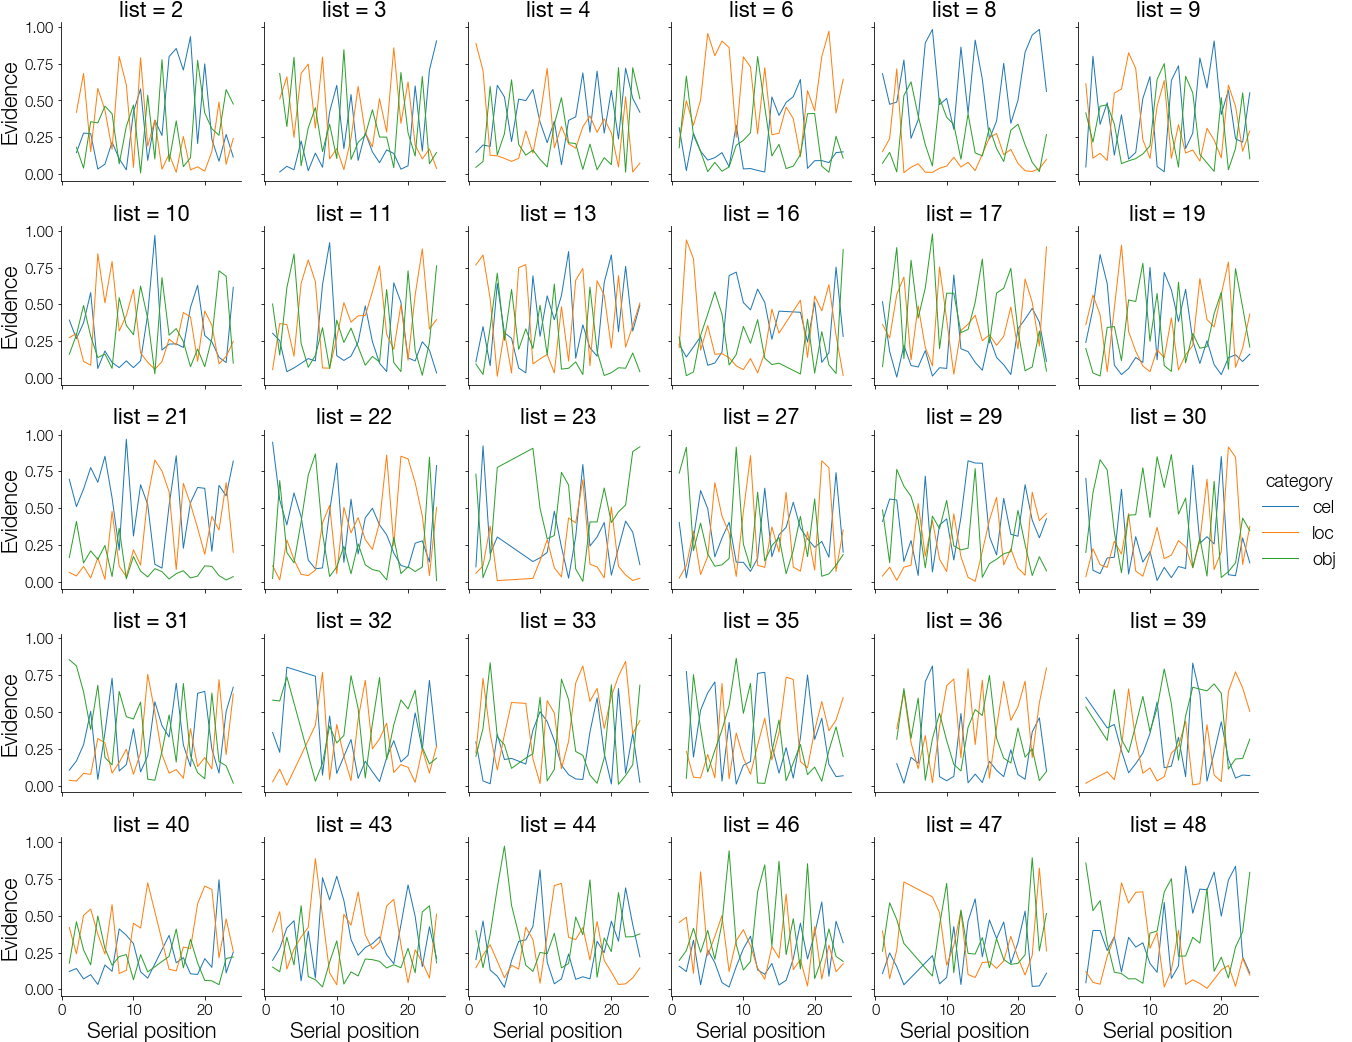

In [5]:
g = figures.plot_trial_evidence(evidence, 1)

## Classifier evidence by block position

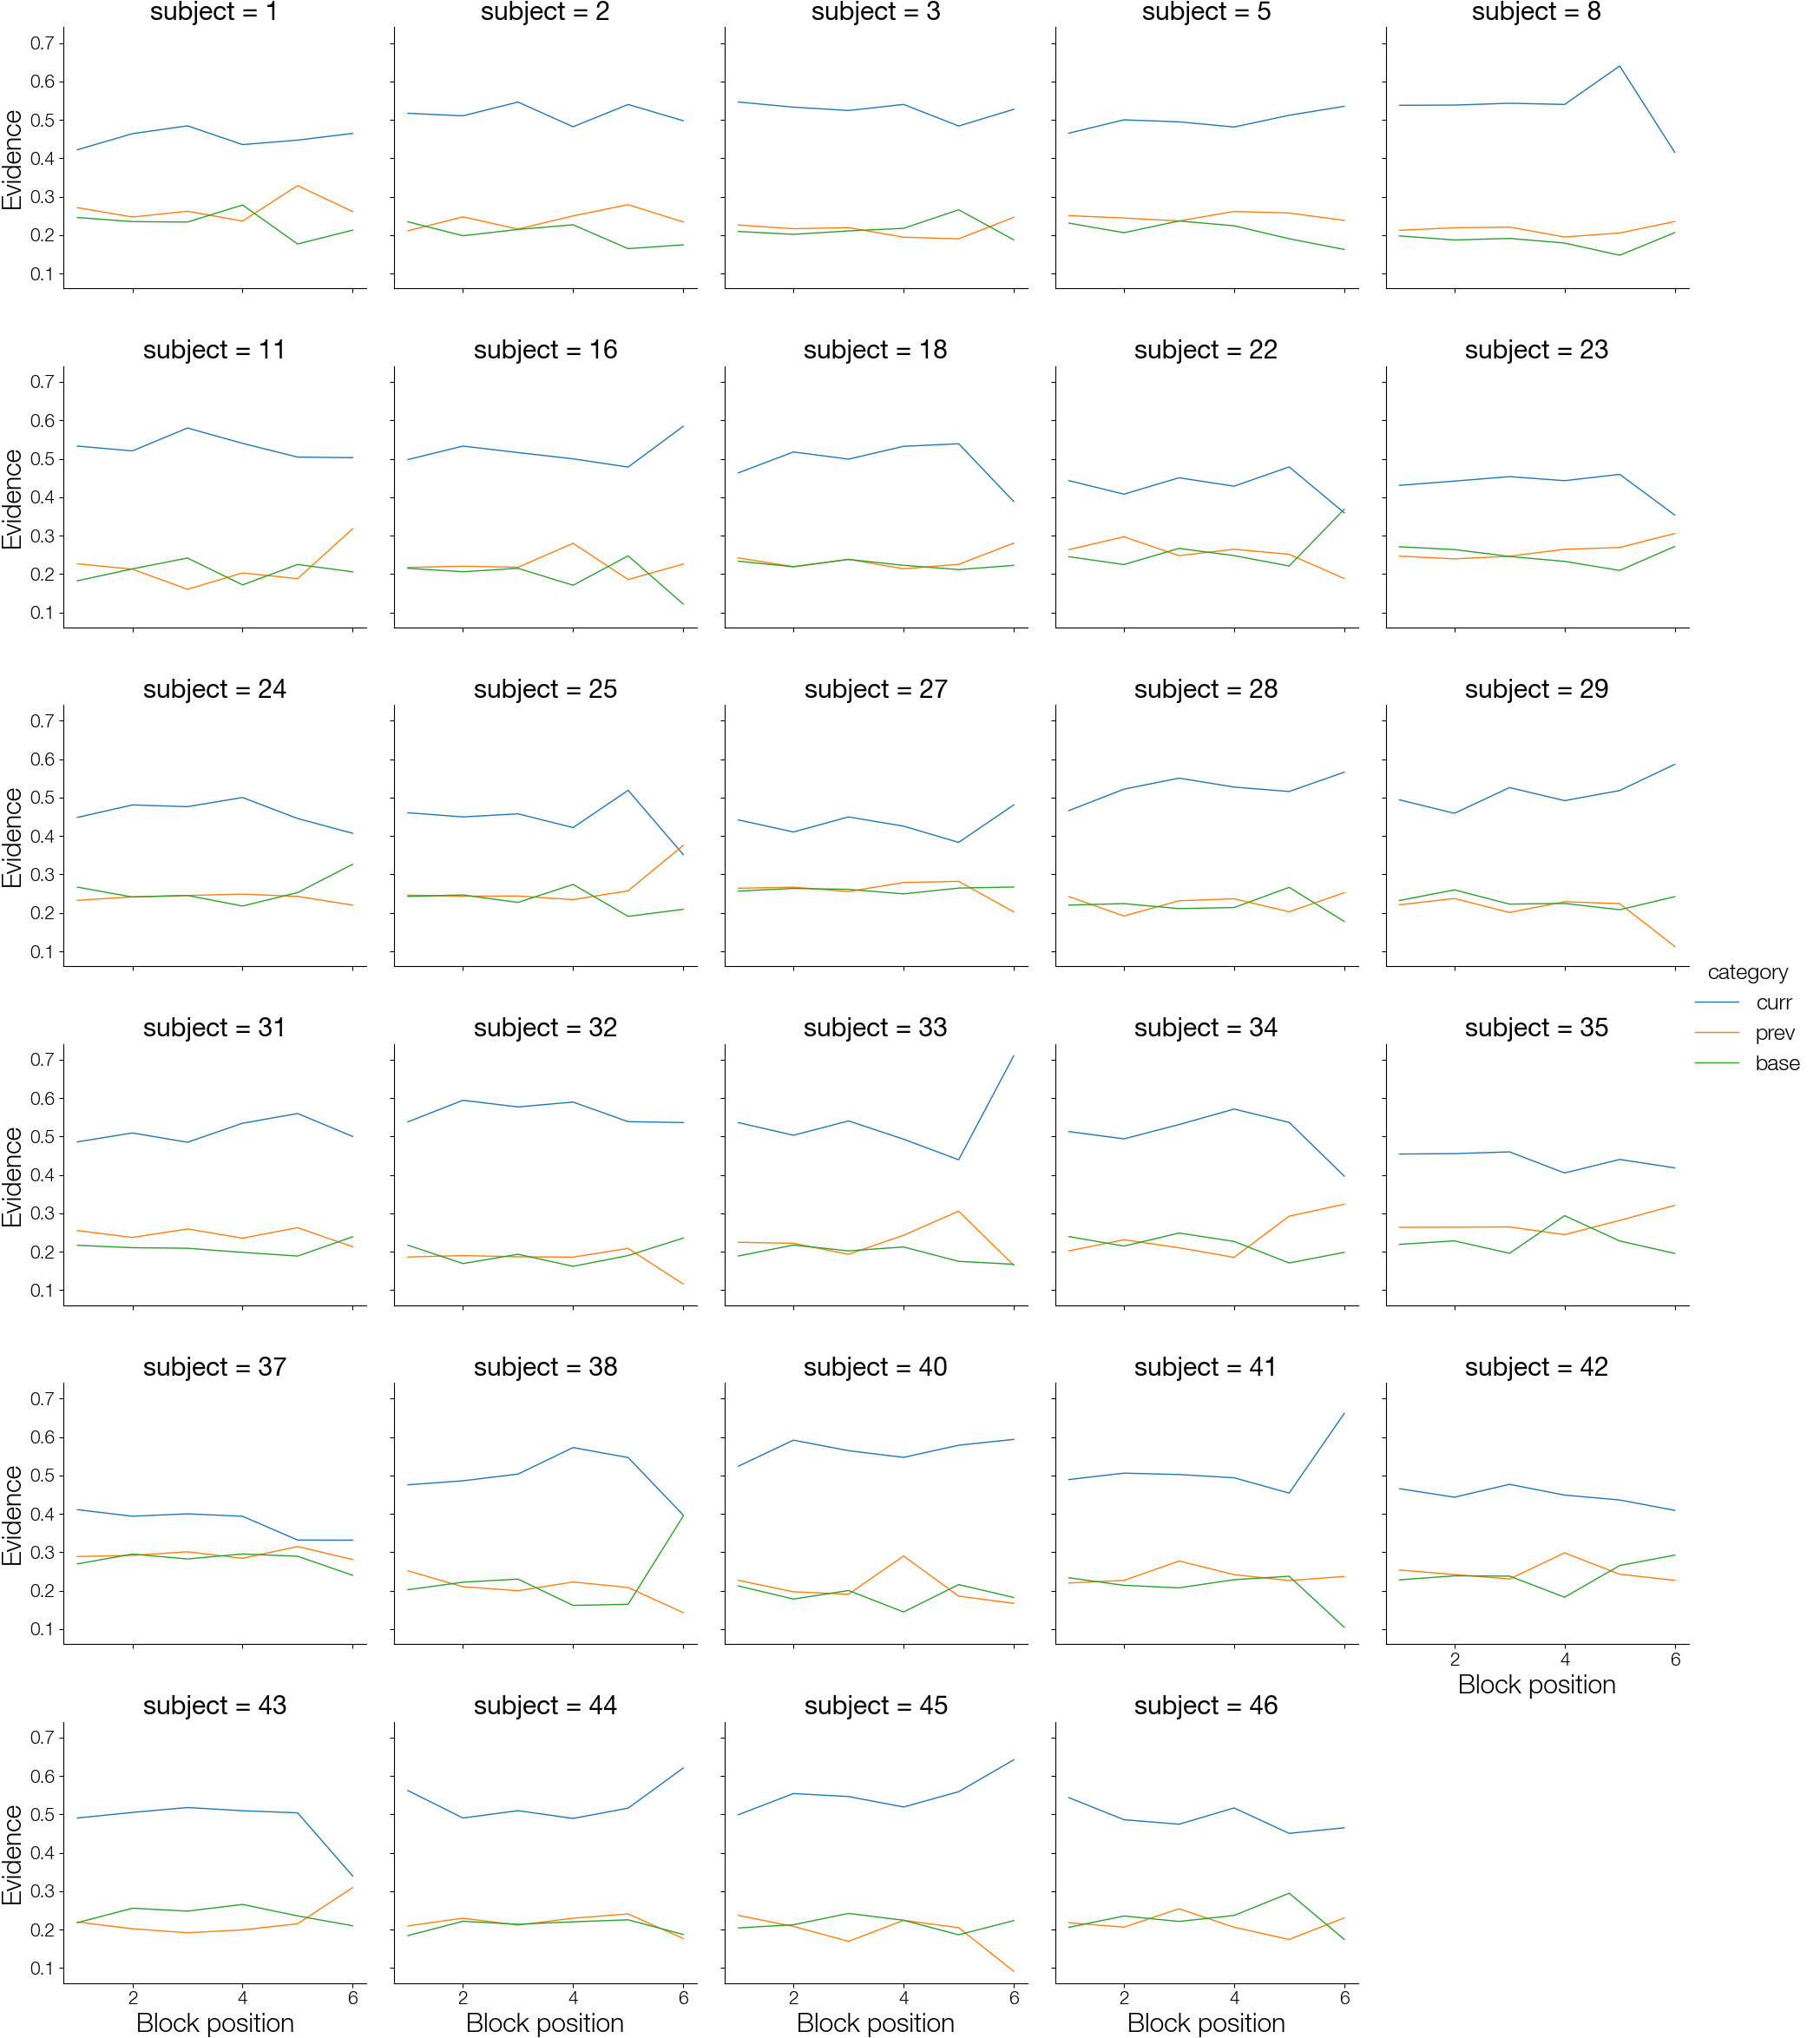

In [6]:
m = decode.evidence_block_pos(evidence)
g = figures.plot_block_pos_evidence(m)

LINO NOT subset; don't know how to subset; dropped


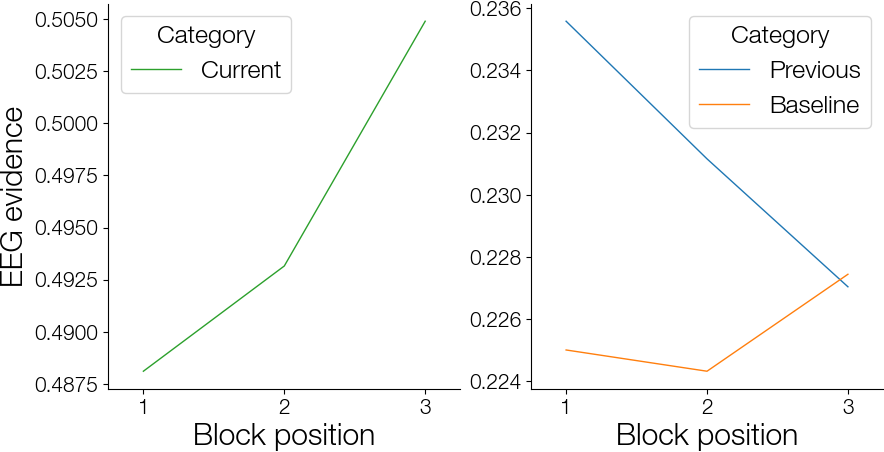

In [7]:
fig, ax = figures.plot_mean_block_pos_evidence(m)
ax[0].set(ylabel=f'{kind_label} evidence')
fig.savefig(fig_dir / f'evidence_block_{kind}.pdf')

## Slope over block position

LINO NOT subset; don't know how to subset; dropped


,curr,prev,base
mean,0.008079,-0.004307,0.001069
sem,0.003096,0.002392,0.002073


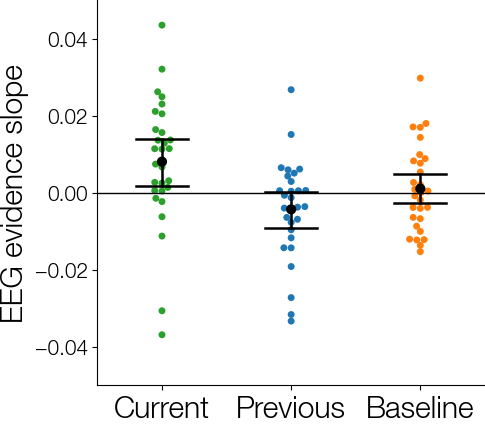

In [8]:
slope = decode.regress_evidence_block_pos(m)
fig, ax = figures.plot_slope_evidence(slope)
ax.set(ylim=(-0.05, 0.05), ylabel=f'{kind_label} evidence slope')
fig.savefig(fig_dir / f'evidence_slope_{kind}.pdf')
slope.agg(['mean', 'sem'])

In [9]:
pg.ttest(slope['curr'], 0, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.609096,28,greater,0.007203,"[0.0, inf]",0.484497,6.701,0.816037


In [10]:
pg.ttest(slope['prev'], 0, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.80046,28,less,0.041285,"[-inf, -0.0]",0.334337,1.638,0.544535


In [11]:
pg.ttest(slope['base'], 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.515695,28,two-sided,0.610115,"[-0.0, 0.01]",0.095762,0.223,0.078889


In [12]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

psifr   : 0.8.1
cfr     : 0.1.0
pandas  : 1.4.4
pingouin: 0.5.2

